# This notebook we're going to see:
<ul>
    <li>Using and adding functions to risk kit</li>
    <li>2 asset - Efficient Frontier </li>
</ul>  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime
import risk_kit as erk
%matplotlib inline

c:\users\home_041\miniconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# auto reload imported modules
%load_ext autoreload
%autoreload 2

# Importing data

In [3]:
ind = pd.read_csv('data/ind30_m_vw_rets.csv', header=0, index_col=0, parse_dates = True)/100

#### parsing to datetime

In [4]:
ind.index = pd.to_datetime(ind.index, format = "%Y%m")

#### adjusting periods to months

In [5]:
ind.index = pd.to_datetime(ind.index, format = "%Y%m").to_period('M')
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


##### fixing spaces in the end of the columns

In [6]:
ind.columns= ind.columns.str.strip()

### Add to risk kit

In [7]:
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    ind = pd.read_csv('data/ind30_m_vw_rets.csv', header=0, index_col=0, parse_dates = True)/100
    ind.index = pd.to_datetime(ind.index, format = "%Y%m").to_period('M')
    ind.columns= ind.columns.str.strip()
    return ind


In [8]:
ind_01 = erk.get_ind_returns()

#### Compute Drawdowns

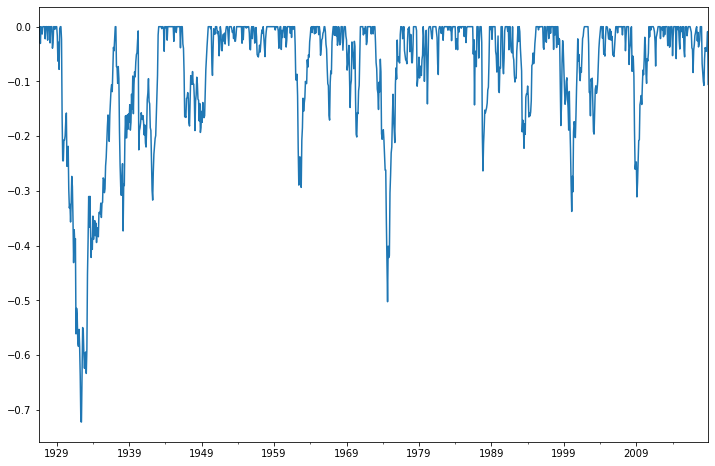

In [9]:
erk.drawdown(ind_01['Food'])['Drawdown'].plot.line(figsize=(12,8))

### computing var_gaussian

In [10]:
cols_of_interest = ['Food','Smoke','Coal','Beer','Fin']
erk.var_gaussian(ind[cols_of_interest], modified = True).sort_values()

Beer     0.033881
Coal     0.047359
Food     0.061207
Fin      0.075199
Smoke    0.080292
dtype: float64

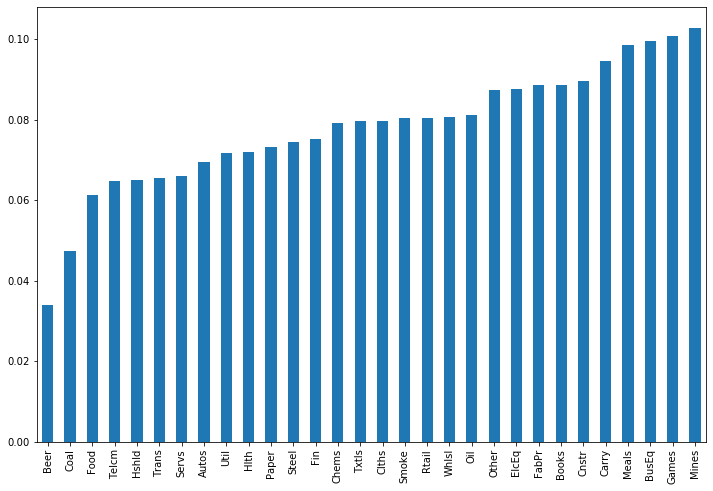

In [11]:
erk.var_gaussian(ind, modified = True).sort_values().plot.bar(figsize=(12,8))

### Add to risk kit

In [12]:
def annualize_rets(r, periods_per_year):
    """
    Annualize a set of returns
    
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol (r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    
    """
    return r.std()*(periods_per_year**0.5)



In [13]:
def sharpe_ratio(r, risk_free_rate, periods_per_year):
    """
    computes the annualized sharpe ratio of a set of returns
    """
    rf_per_period = (1+risk_free_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

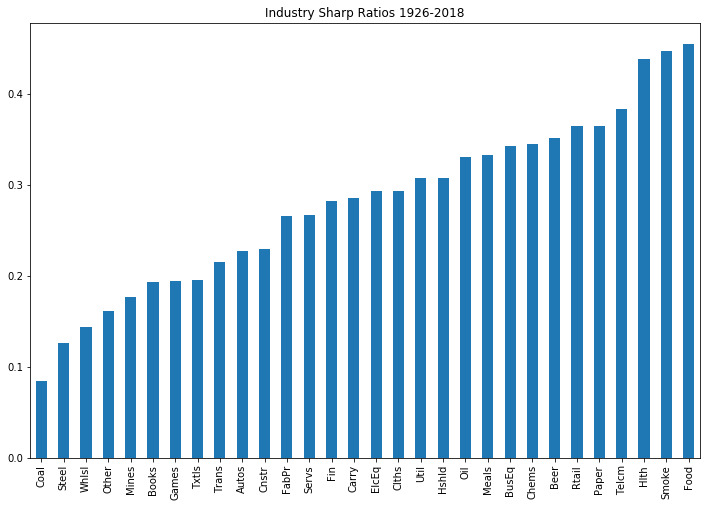

In [14]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(figsize=(12,8), title = "Industry Sharp Ratios 1926-2018")

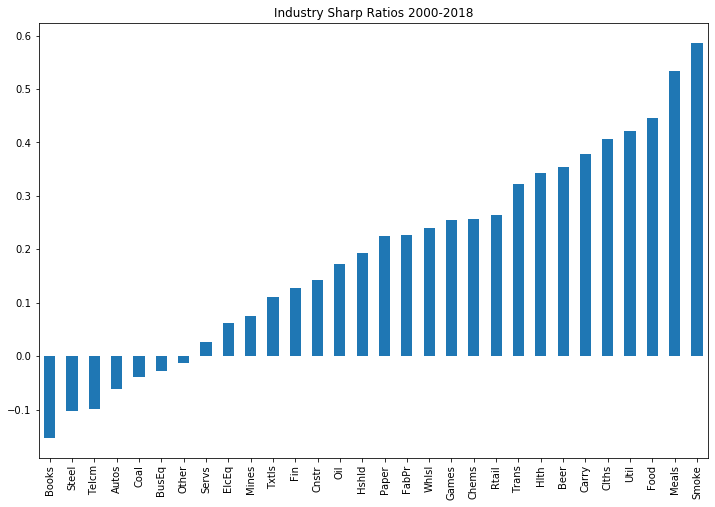

In [15]:
erk.sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(figsize=(12,8), title = "Industry Sharp Ratios 2000-2018")

##### in sample exercice

## Getting Returns and Risk

In [16]:
### expected returns 
er = erk.annualize_rets(ind['1995':'2000'],12)

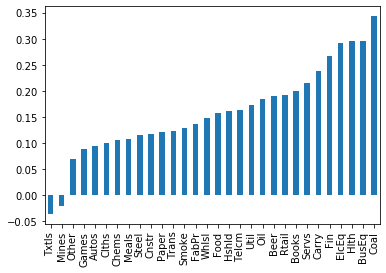

In [17]:
er.sort_values().plot.bar()

In [18]:
cov = ind['1995':'2000'].cov()

In [19]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


#### add to erk

In [20]:
def portfolio_return(weights, returns):
    """
    weights -> returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights -> volt
    """
    return (weights.T @ covmat @ weights)**0.5

In [21]:
l = ['Food','Beer', 'Smoke', 'Coal']
er[l]

Food     0.157362
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64

In [22]:
#row and column
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002287,0.002077,0.001757,0.000034
Beer,0.002077,0.004599,0.001143,0.001261
Smoke,0.001757,0.001143,0.007130,-0.000544
Coal,0.000034,0.001261,-0.000544,0.016153


In [23]:
weights = np.repeat(1/4,4)
erk.portfolio_return(weights, er[l])

0.20496820684146116

In [24]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.05100412722141178

### 2 Asset Frontier

In [25]:
l = ['Games','Fin']

In [26]:
n_points = 20

In [27]:
# 
weights = [np.array([w,1-w]) for w in np.linspace(0,1, n_points)]

In [28]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [29]:
len(weights)

20

In [30]:
l

['Games', 'Fin']

In [31]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]

In [32]:
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef= pd.DataFrame({'Returns':rets, 'Vol': vols})

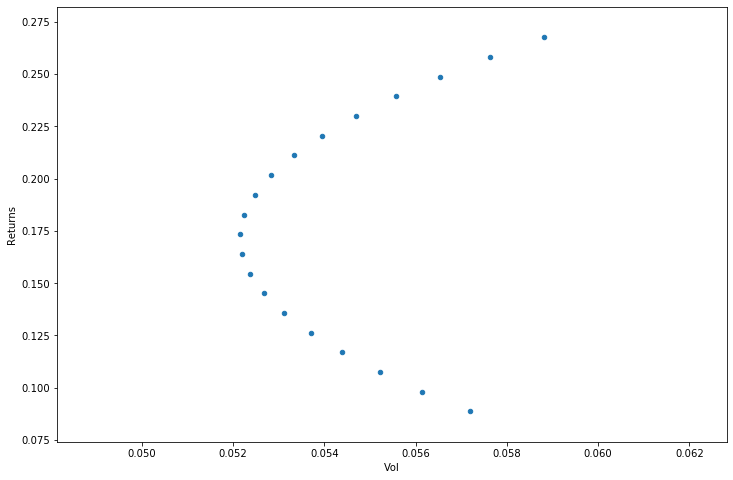

In [33]:
ef.plot.scatter(x='Vol',y='Returns', figsize=(12,8))

#### add to risk_kit

In [34]:
def plot_ef2(n_points, er, cov, style="-"):
    """
    plot 2 asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2- asset frontiers")
    weights = [np.array([w,1-w]) for w in np.linspace(0,1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef= pd.DataFrame({'Returns':rets, 'Vol': vols})
    return ef.plot.line(x='Vol',y='Returns',  style = '.-', figsize=(12,8))

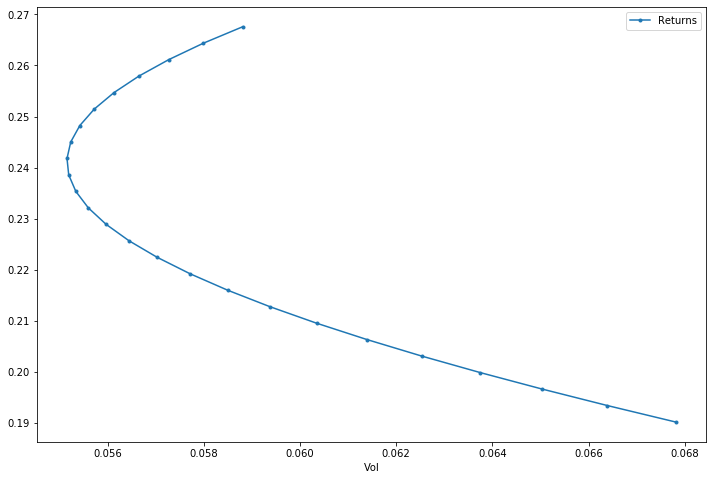

In [35]:
l = ['Fin', 'Beer']
erk.plot_ef2(25, er[l], cov.loc[l,l])